In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from matplotlib.dates import DateFormatter

In [2]:
post_df_full = pd.read_csv("Data/MissUniversePredictions1.csv")

In [3]:
post_df_full1=post_df_full
post_df_full1[['post_id', 'reactions']]

,post_id,reactions
0,875795853991623,"{'thích': 2630, 'yêu thích': 1675, 'haha': 10,..."
1,875657524005456,"{'thích': 682, 'yêu thích': 499, 'haha': 23, '..."
2,875192604051948,"{'thích': 466, 'yêu thích': 218, 'wow': 2, 'th..."
3,875142550723620,"{'thích': 292, 'yêu thích': 235, 'haha': 6, 't..."
4,875141117390430,"{'thích': 617, 'yêu thích': 176, 'haha': 3, 'w..."
...,...,...
95,869628007941741,"{'thích': 2154, 'yêu thích': 1018, 'wow': 29, ..."
96,869537041284171,"{'thích': 2296, 'yêu thích': 2312, 'haha': 3, ..."
97,869479791289896,"{'thích': 213, 'yêu thích': 333, 'wow': 2, 'th..."
98,869477637956778,"{'thích': 765, 'yêu thích': 303, 'haha': 1, 'w..."


In [4]:
post_df_full2=post_df_full[['time','timestamp' ,'reaction_count']]
post_df_full2

,time,timestamp,reaction_count
0,2023-11-26 10:31:43,1700994703,4357
1,2023-11-26 03:35:07,1700969707,1223
2,2023-11-25 04:54:58,1700888098,692
3,2023-11-25 02:14:22,1700878462,538
4,2023-11-25 02:09:34,1700878174,801
...,...,...,...
95,2023-11-14 10:02:44,1699956164,3236
96,2023-11-14 05:01:11,1699938071,4677
97,2023-11-14 02:06:47,1699927607,556
98,2023-11-14 02:01:19,1699927279,1169


/tmp/ipykernel_1405/660445540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
/tmp/ipykernel_1405/660445540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['date'] = post_df_full2['time'].dt.date


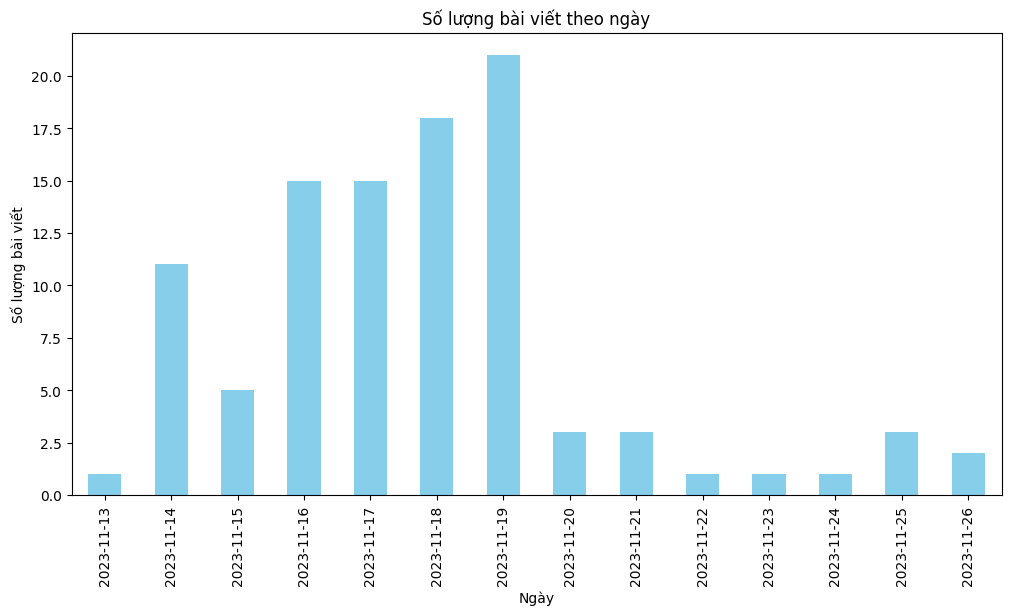

In [5]:
post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
post_df_full2['date'] = post_df_full2['time'].dt.date
plt.figure(figsize=(12, 6))
post_df_full2['date'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Số lượng bài viết theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bài viết')
plt.show()

/tmp/ipykernel_60491/332159449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
/tmp/ipykernel_60491/332159449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['hour'] = post_df_full2['time'].dt.hour


<Figure size 1200x600 with 0 Axes>

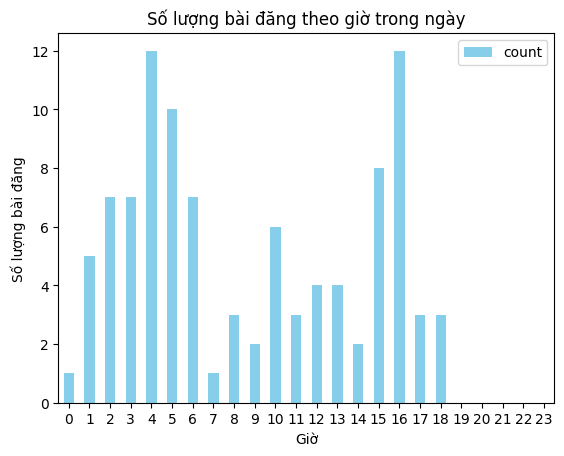

In [6]:
post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
post_df_full2['hour'] = post_df_full2['time'].dt.hour
posts_per_hour = post_df_full2.groupby('hour').size()
all_hours = pd.DataFrame({'hour': range(24), 'count': 0}).set_index('hour')
all_hours['count'] = posts_per_hour
plt.figure(figsize=(12, 6))
all_hours.plot(kind='bar', y='count', color='skyblue')
plt.title('Số lượng bài đăng theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=0)
plt.show()


In [7]:

high_reaction_posts = post_df_full2[post_df_full2['reaction_count'] > 1000]
num_high_reaction_posts = len(high_reaction_posts)
print(f"Số lượng bài đăng có reaction_count lớn hơn 10000: {num_high_reaction_posts}")


Số lượng bài đăng có reaction_count lớn hơn 10000: 70


In [6]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full3 = post_df_full1['reactions'].apply(pd.Series )
post_df_full3 = pd.concat([post_df_full1, post_df_full3], axis=1).drop('reactions', axis=1)
post_df_full3[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Welcome home 🇹🇭 Antonia Porsild, 1st Runner-Up...",2630.0,1675.0,10.0,6.0,NaN,NaN,36.0,395,170,4357
1,"Yes queen, we heard you! Sheynnis Palacios Cor...",682.0,499.0,23.0,1.0,1.0,2.0,15.0,57,96,1223
2,𝐃𝐑𝐎𝐔𝐆𝐇𝐓 𝐁𝐑𝐄𝐀𝐊𝐄𝐑𝐒 | It was a tough competition ...,466.0,218.0,NaN,2.0,NaN,NaN,6.0,11,20,692
3,"FAVORITAS DE PRINCIPIO A FIN, ANTES DE GANAR E...",292.0,235.0,6.0,NaN,NaN,NaN,5.0,4,28,538
4,The Gala Party 👑✨️ l Miss Universe 2023\n\n#Mi...,617.0,176.0,3.0,1.0,NaN,1.0,3.0,21,19,801
...,...,...,...,...,...,...,...,...,...,...,...
95,DAY 10 l Miss Universe 2023 Delegates l Laos 🇱...,2154.0,1018.0,NaN,29.0,NaN,NaN,35.0,129,459,3236
96,OUR MUP PEOPLE'S CHOICE LEADER : MYANMAR 🇲🇲\n•...,2296.0,2312.0,3.0,14.0,NaN,1.0,51.0,193,1216,4677
97,DAY 10 l Miss Universe 2023 Delegates l Philip...,213.0,333.0,NaN,2.0,NaN,NaN,8.0,7,26,556
98,𝐌𝐔 ‘𝟐𝟑 𝐖𝐀𝐓𝐂𝐇 | The stage is up! What can you s...,765.0,303.0,1.0,90.0,NaN,NaN,10.0,30,50,1169


In [7]:
for i in range(0, len(post_df_full3['thích'].values), 1):
    post_df_full3['thích'].values[i] = 0 if pd.isna(post_df_full3['thích'].values[i]) else post_df_full3['thích'].values[i]
    post_df_full3['yêu thích'].values[i] = 0 if pd.isna(post_df_full3['yêu thích'].values[i]) else post_df_full3['yêu thích'].values[i]
    post_df_full3['haha'].values[i] = 0 if pd.isna(post_df_full3['haha'].values[i]) else post_df_full3['haha'].values[i]
    post_df_full3['wow'].values[i] = 0 if pd.isna(post_df_full3['wow'].values[i]) else post_df_full3['wow'].values[i]
    post_df_full3['buồn'].values[i] = 0 if pd.isna(post_df_full3['buồn'].values[i]) else post_df_full3['buồn'].values[i]
    post_df_full3['phẫn nộ'].values[i] = 0 if pd.isna(post_df_full3['phẫn nộ'].values[i]) else post_df_full3['phẫn nộ'].values[i]
    post_df_full3['thương thương'].values[i] = 0 if pd.isna(post_df_full3['thương thương'].values[i]) else post_df_full3['thương thương'].values[i]
    post_df_full3['shares'].values[i] = 0 if pd.isna(post_df_full3['shares'].values[i]) else post_df_full3['shares'].values[i]
    post_df_full3['comments'].values[i] = 0 if pd.isna(post_df_full3['comments'].values[i]) else post_df_full3['comments'].values[i]
post_df_full3[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Welcome home 🇹🇭 Antonia Porsild, 1st Runner-Up...",2630.0,1675.0,10.0,6.0,0.0,0.0,36.0,395,170,4357
1,"Yes queen, we heard you! Sheynnis Palacios Cor...",682.0,499.0,23.0,1.0,1.0,2.0,15.0,57,96,1223
2,𝐃𝐑𝐎𝐔𝐆𝐇𝐓 𝐁𝐑𝐄𝐀𝐊𝐄𝐑𝐒 | It was a tough competition ...,466.0,218.0,0.0,2.0,0.0,0.0,6.0,11,20,692
3,"FAVORITAS DE PRINCIPIO A FIN, ANTES DE GANAR E...",292.0,235.0,6.0,0.0,0.0,0.0,5.0,4,28,538
4,The Gala Party 👑✨️ l Miss Universe 2023\n\n#Mi...,617.0,176.0,3.0,1.0,0.0,1.0,3.0,21,19,801
...,...,...,...,...,...,...,...,...,...,...,...
95,DAY 10 l Miss Universe 2023 Delegates l Laos 🇱...,2154.0,1018.0,0.0,29.0,0.0,0.0,35.0,129,459,3236
96,OUR MUP PEOPLE'S CHOICE LEADER : MYANMAR 🇲🇲\n•...,2296.0,2312.0,3.0,14.0,0.0,1.0,51.0,193,1216,4677
97,DAY 10 l Miss Universe 2023 Delegates l Philip...,213.0,333.0,0.0,2.0,0.0,0.0,8.0,7,26,556
98,𝐌𝐔 ‘𝟐𝟑 𝐖𝐀𝐓𝐂𝐇 | The stage is up! What can you s...,765.0,303.0,1.0,90.0,0.0,0.0,10.0,30,50,1169


In [8]:
post_df_full3[['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương',
                'shares', 'comments', 'reaction_count']].to_csv("Data/dataclean_reaction.csv", index=False)


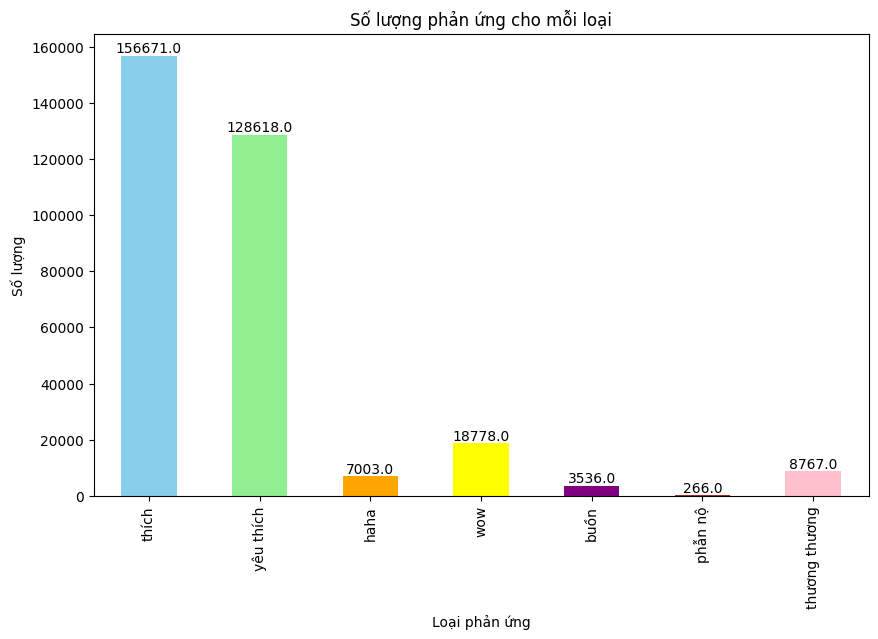

In [11]:
reaction_columns = ['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']
reaction_counts = post_df_full3[reaction_columns].sum()
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'orange', 'yellow', 'purple', 'brown', 'pink']  
reaction_counts.plot(kind='bar', color=colors)
plt.title('Số lượng phản ứng cho mỗi loại')
plt.xlabel('Loại phản ứng')
plt.ylabel('Số lượng')
for i, count in enumerate(reaction_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

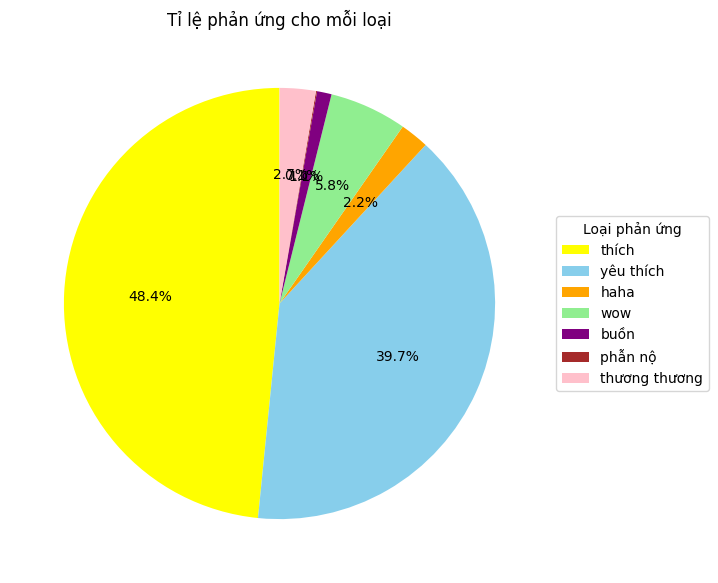

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['yellow', 'skyblue', 'orange', 'lightgreen', 'purple', 'brown', 'pink'] 
wedges, texts, autotexts = ax.pie(reaction_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Tỉ lệ phản ứng cho mỗi loại')
ax.legend(wedges, reaction_columns, title='Loại phản ứng', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

/tmp/ipykernel_60491/1503092265.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_60491/1503092265.py:9: UserWarning: The palette list has more values (60) than needed (7), which may not be intended.
  ax = sns.barplot(


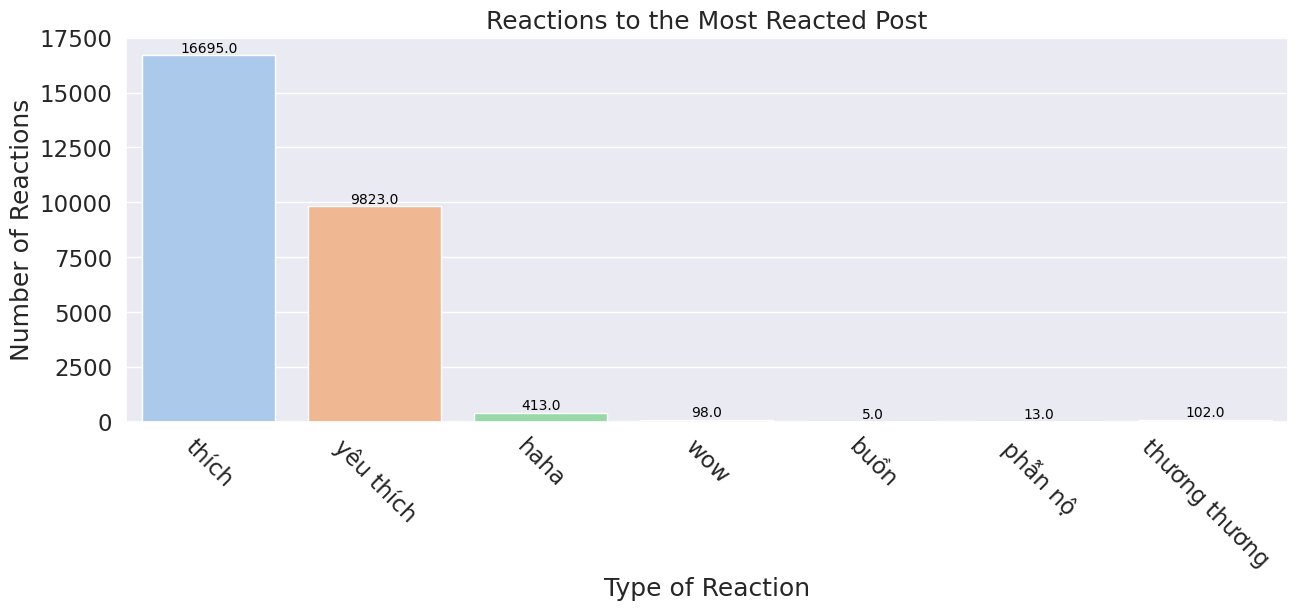

In [13]:
most_reaction_post = post_df_full3.loc[
    post_df_full3['reaction_count'].idxmax()
]
colors = sns.color_palette("pastel", len(most_reaction_post))
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (15, 5)})
sns.set(font_scale=1.5)
fig, ax = plt.subplots()
ax = sns.barplot(
    x=list(most_reaction_post[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].keys()),
    y=list(most_reaction_post[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].values),
    palette=colors)
ax.set_title("Reactions to the Most Reacted Post")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
for i, val in enumerate(most_reaction_post[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].values):
    ax.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10, color='black')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


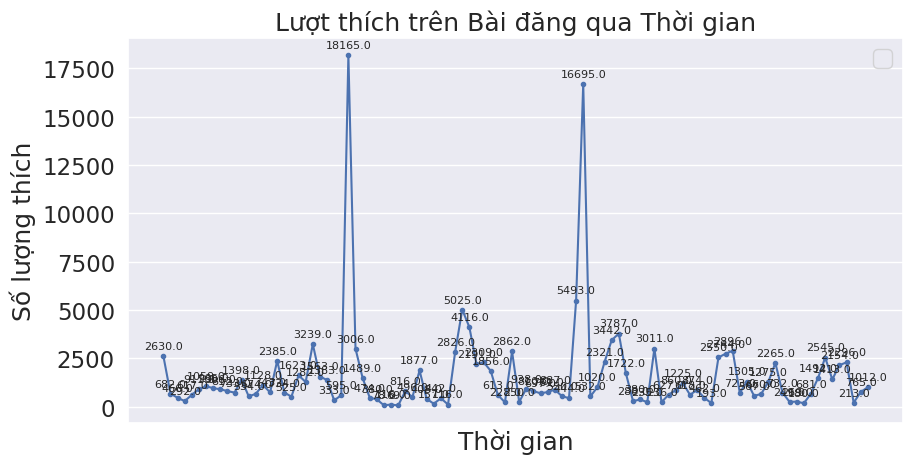

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['thích'],'.-')
for i, txt in enumerate(post_df_full3['thích']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt thích trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng thích')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


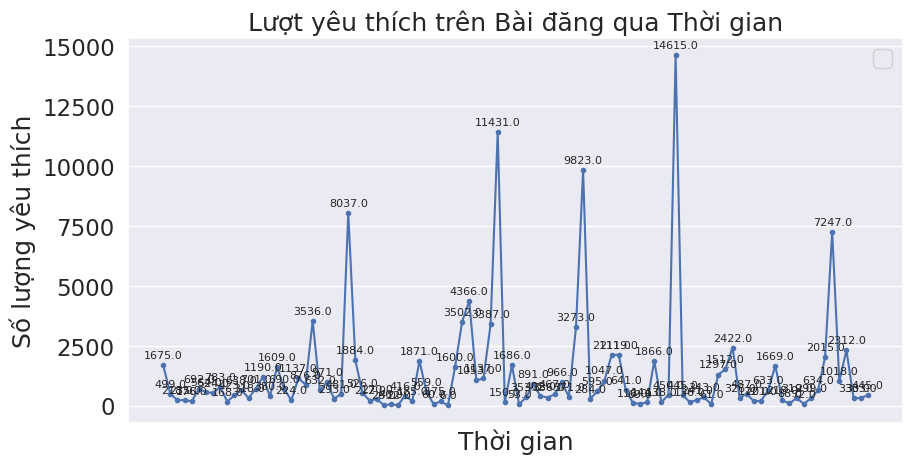

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['yêu thích'], '.-')
for i, txt in enumerate(post_df_full3['yêu thích']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt yêu thích trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng yêu thích')
plt.legend()
plt.grid(True)
plt.show()

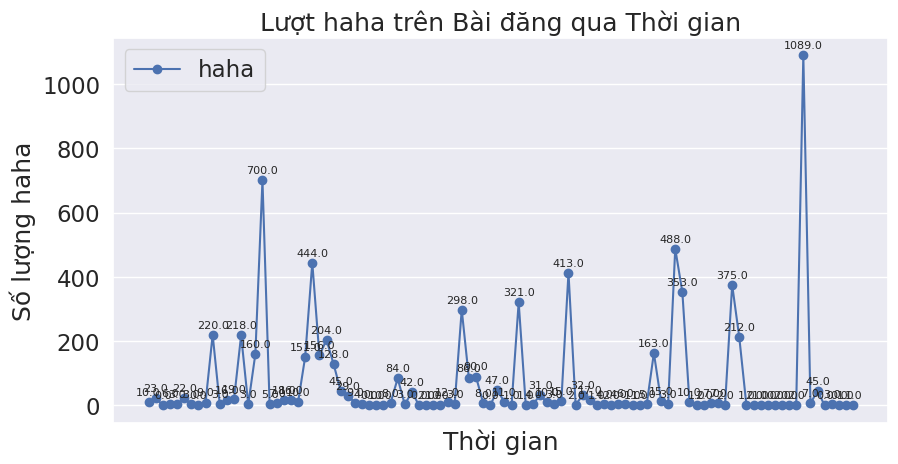

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['haha'], '.-')
for i, txt in enumerate(post_df_full3['haha']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt haha trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng haha')
plt.legend()
plt.grid(True)
plt.show()

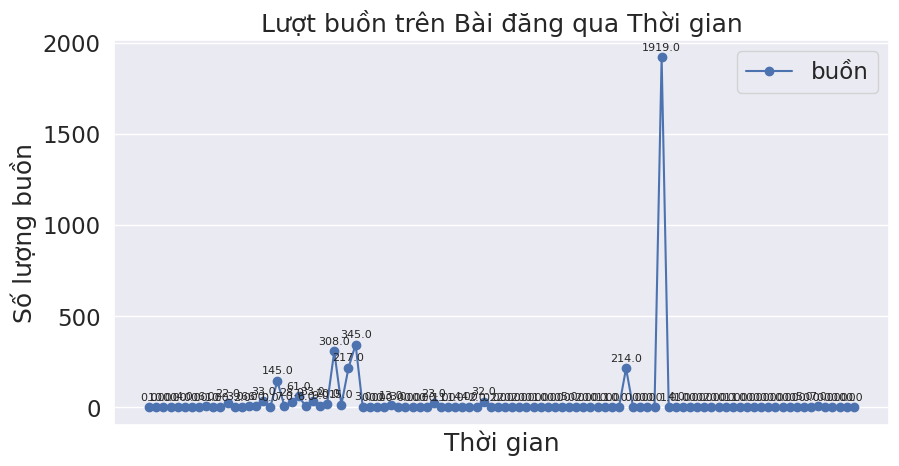

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['buồn'], '.-')
for i, txt in enumerate(post_df_full3['buồn']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt buồn trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng buồn')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


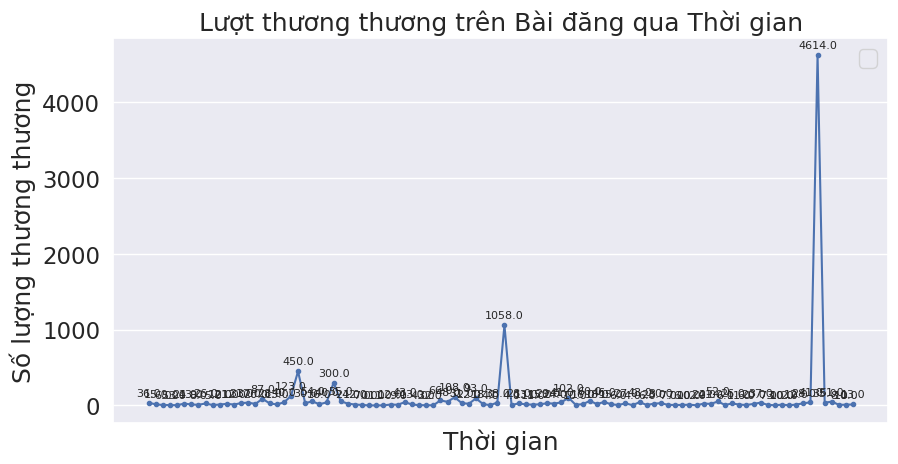

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['thương thương'], '.-')
for i, txt in enumerate(post_df_full3['thương thương']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt thương thương trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng thương thương')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


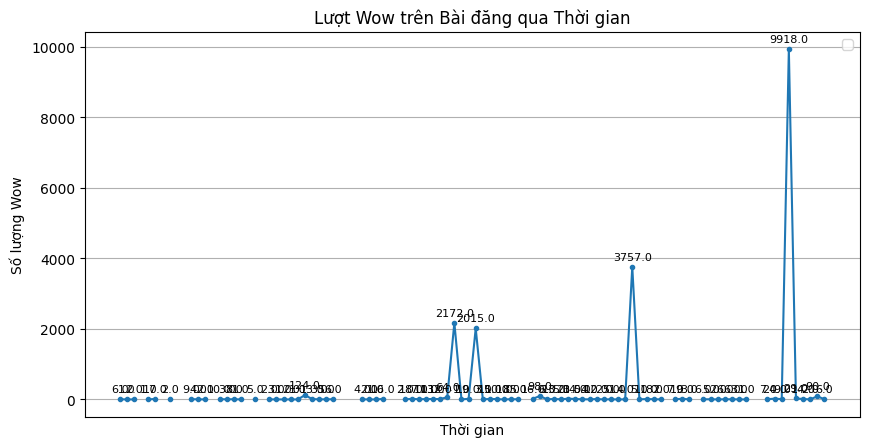

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['wow'], '.-')
for i, txt in enumerate(post_df_full3['wow']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt Wow trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Wow')
plt.legend()
plt.grid(True)
plt.show()

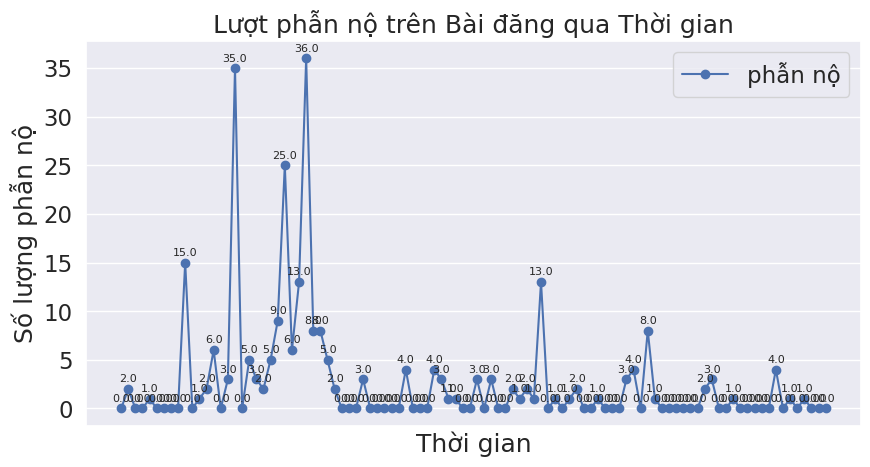

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['phẫn nộ'], '.-')
for i, txt in enumerate(post_df_full3['phẫn nộ']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt phẫn nộ trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng phẫn nộ')
plt.legend()
plt.grid(True)
plt.show()

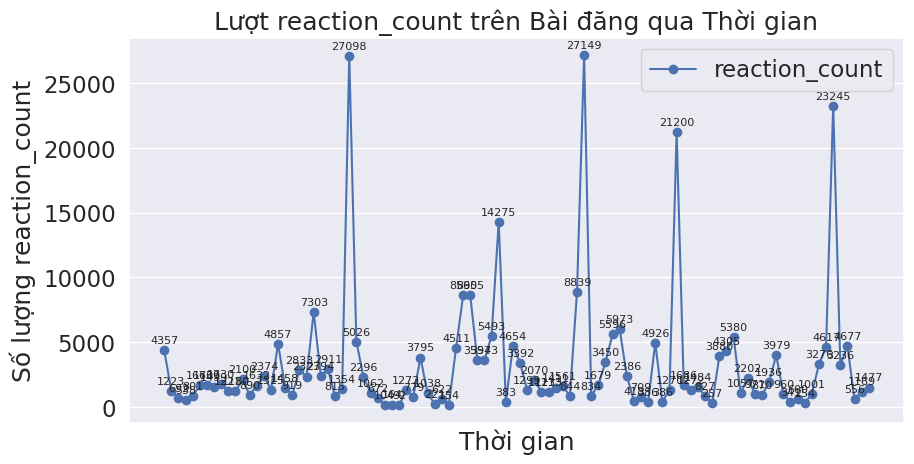

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['reaction_count'], '.-')
for i, txt in enumerate(post_df_full3['reaction_count']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt reaction_count trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng reaction_count')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


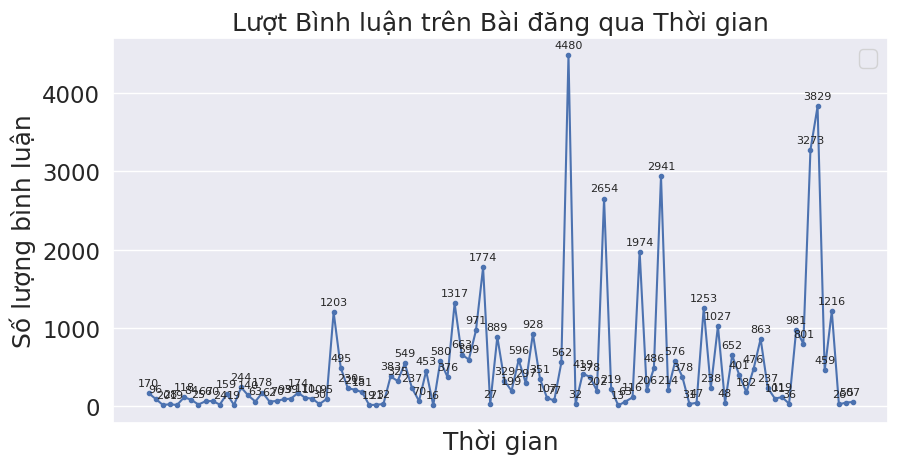

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(post_df_full3['time'], post_df_full3['comments'],'.-')
for i, txt in enumerate(post_df_full3['comments']):
    ax.annotate(txt, (post_df_full3['time'][i], txt), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xticks([])
plt.title('Lượt Bình luận trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng bình luận')
plt.legend()
plt.grid(True)
plt.show()


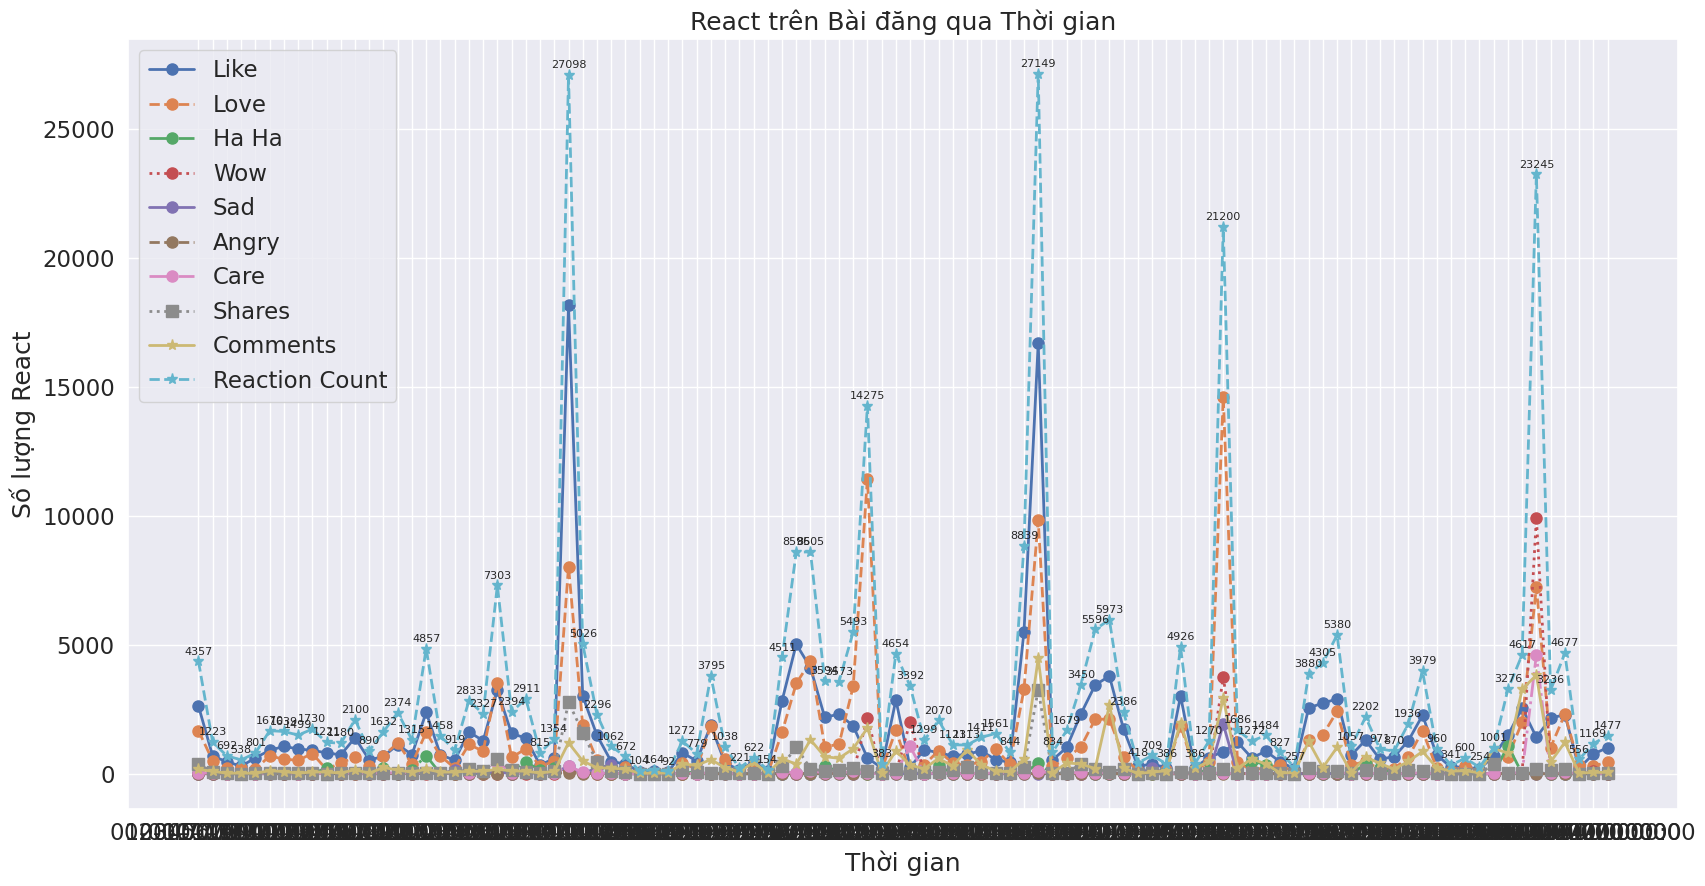

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full3['time'], post_df_full3['thích'], label="Like", marker="o", linestyle='-', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['yêu thích'], label="Love", marker="o", linestyle='--', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['haha'], label="Ha Ha", marker="o", linestyle='-.', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['wow'], label="Wow", marker="o", linestyle=':', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['buồn'], label="Sad", marker="o", linestyle='-', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['phẫn nộ'], label="Angry", marker="o", linestyle='--', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['thương thương'], label="Care", marker="o", linestyle='-.', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['shares'], label="Shares", marker="s", linestyle=':', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['comments'], label="Comments", marker="*", linestyle='-', linewidth=2, markersize=8)
ax.plot(post_df_full3['time'], post_df_full3['reaction_count'], label="Reaction Count", marker="*", linestyle='--', linewidth=2, markersize=8)
for i, txt in enumerate(post_df_full3['reaction_count']):
    ax.annotate(txt, (post_df_full3['time'][i], post_df_full3['reaction_count'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.title('React trên Bài đăng qua Thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng React')
plt.legend()
plt.grid(True)

plt.show()


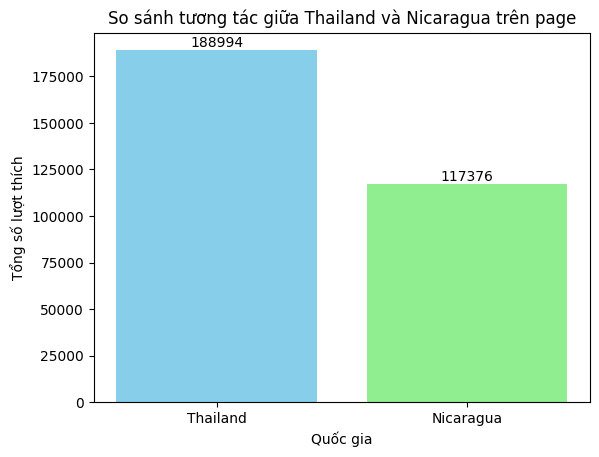

In [21]:
import re
thailand_posts = post_df_full3[post_df_full3['post_text'].str.contains('Thailand|Antonia Porsild', case=False, na=False)]
nicaragua_posts = post_df_full3[post_df_full3['post_text'].str.contains('Nicaragua|Sheynnis Palacios Cornejo', case=False, na=False)]
thailand_likes = thailand_posts['reaction_count'].sum()
nicaragua_likes = nicaragua_posts['reaction_count'].sum()
categories = ['Thailand', 'Nicaragua']
totals = [thailand_likes , nicaragua_likes ]
plt.bar(categories, totals, color=['skyblue', 'lightgreen' ])
plt.xlabel('Quốc gia')
plt.ylabel('Tổng số lượt thích')
plt.title('So sánh tương tác giữa Thailand và Nicaragua trên page')
for i, total in enumerate(totals):
    plt.text(i, total + 0.1, str(total), ha='center', va='bottom')
plt.show()



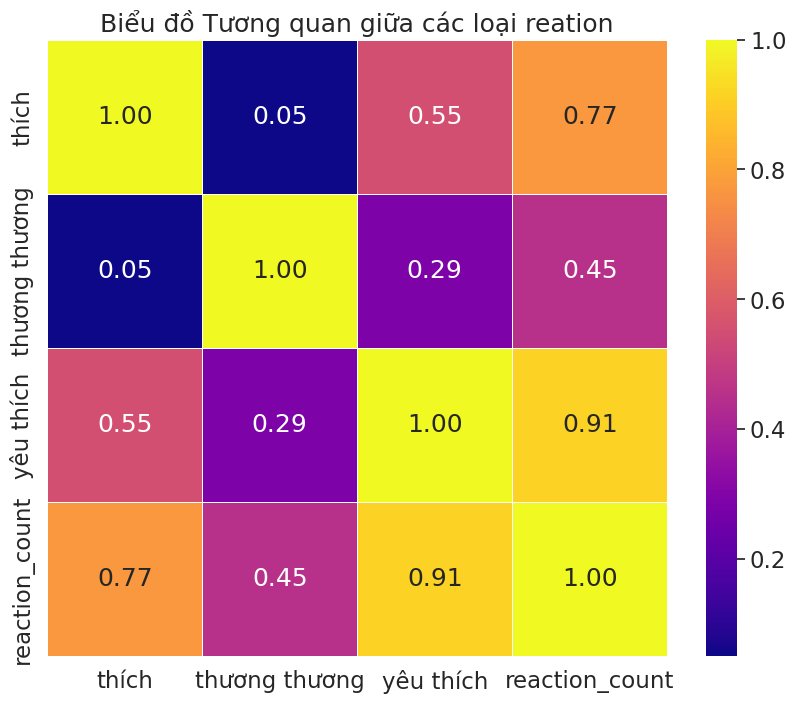

In [ ]:
interaction_data = post_df_full3[['thích', 'thương thương','yêu thích', 'reaction_count']]
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_data.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ Tương quan giữa các loại reation')
plt.show()

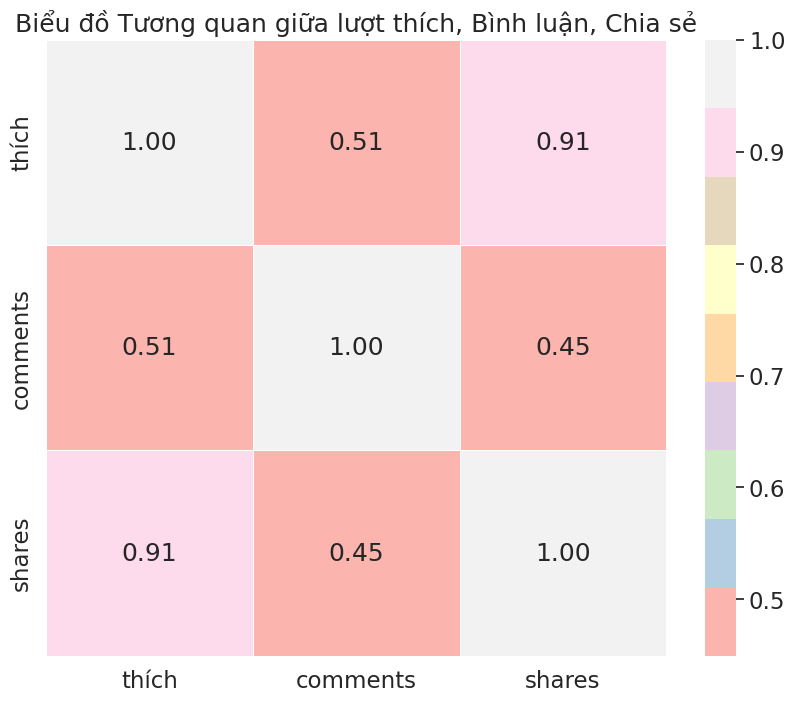

In [ ]:
interaction_data = post_df_full3[['thích', 'comments', 'shares']]
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_data.corr(), annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ Tương quan giữa lượt thích, Bình luận, Chia sẻ')
plt.show()


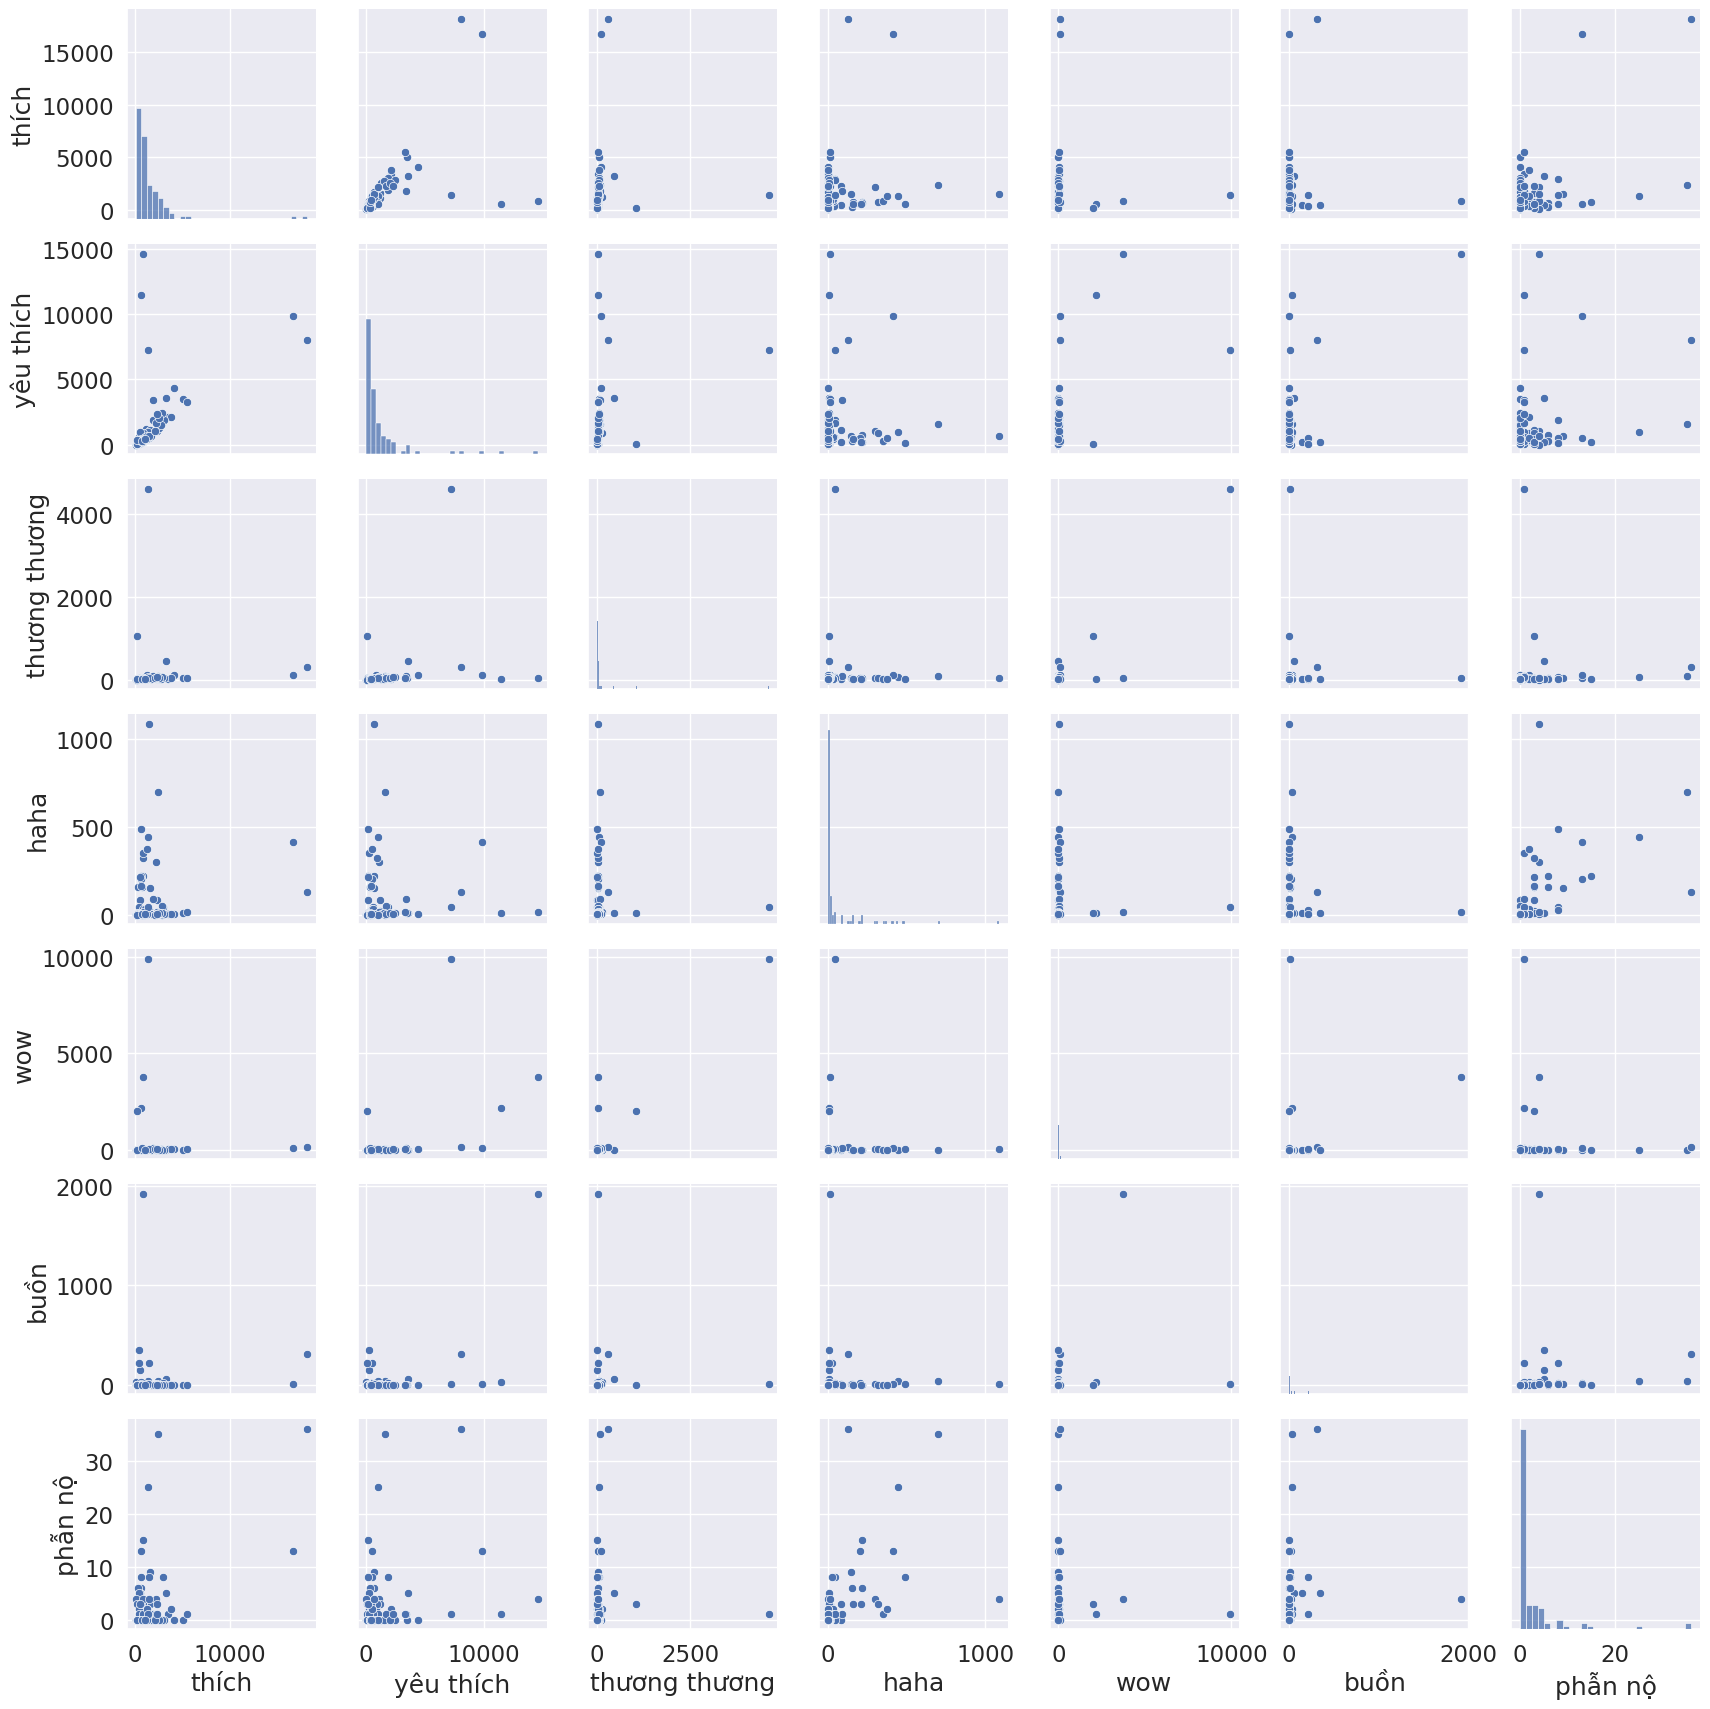

In [ ]:
sns.pairplot(post_df_full3, vars=['thích', 'yêu thích', 'thương thương', 'haha', 'wow', 'buồn', 'phẫn nộ'])